# Phys555 Assignment 1 Question 3

Q3- Add noise to the MNIST data set (explore the web to find a good example). Compare the explained variance ratio vs. the principle components (plots) and find the best first components so that the added noise is removed/cancelled. Change the amplitude of the noise and have a discussion in the notebook. 

https://scikit-image.org/docs/stable/api/skimage.util.html#random-noise

In [1]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
import skimage
import matplotlib.pyplot as plt

(60000, 784)
(60000, 784)


Text(0.5, 1.0, 'Original Image vs Added Noise')

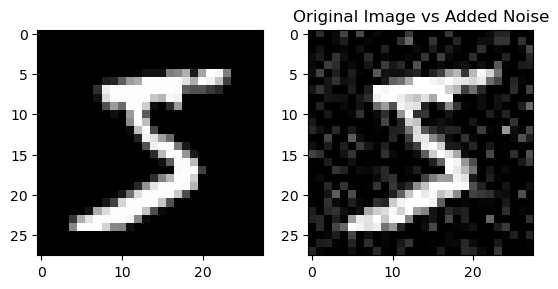

In [2]:
(inp_tr, tar_tr), (inp_va, tar_va) = mnist.load_data()
inp_tr = inp_tr/255.
inp_va = inp_va/255.
inp_tr=np.reshape(inp_tr,(-1,28*28))
inp_va=np.reshape(inp_va,(-1,28*28))

print(inp_tr.shape)

# Would you add noise to the validation set as well? I don't think so... 

noisy_images_tr = skimage.util.random_noise(inp_tr, mode='gaussian', seed=None, clip=True, var=0.02)
#noisy_images = skimage.util.random_noise(inp_tr, mode='s&p', seed=None, clip=True, amount=0.1)
#noisy_images = skimage.util.random_noise(inp_tr, mode='localvar', seed=None, clip=True)
print(noisy_images_tr.shape)

# Look at the first image with noise
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(inp_tr[0].reshape(28,28),cmap='gray')
ax2.imshow(noisy_images_tr[0].reshape(28,28),cmap='gray')
plt.title('Original Image vs Added Noise')

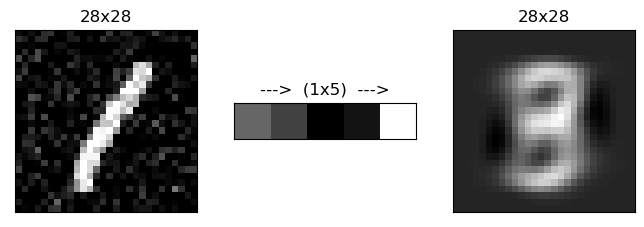

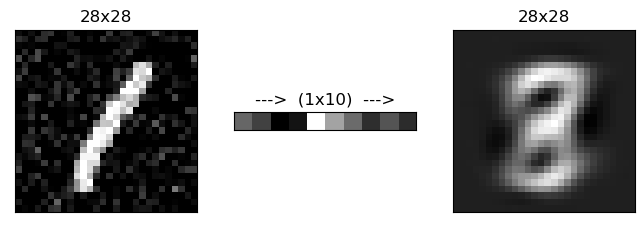

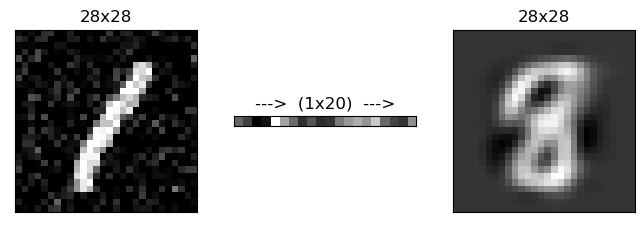

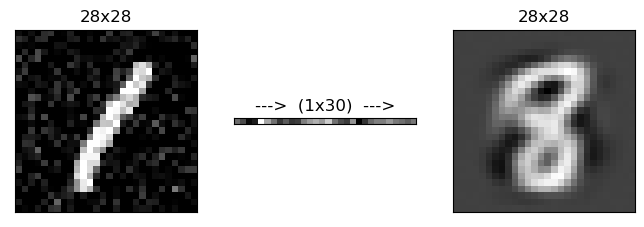

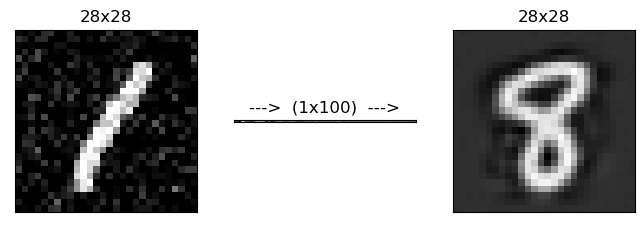

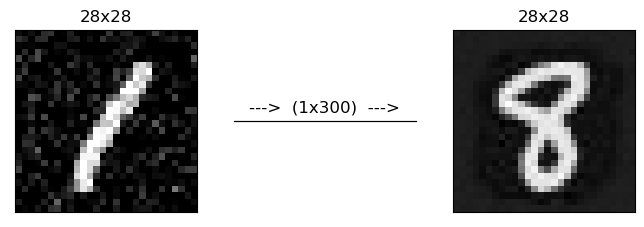

In [4]:
n_pic = np.random.choice(np.arange(len(inp_va)))

for kc in [5,10,20,30,100,300]:
    n_components=kc
    pca=PCA(n_components=n_components)

    pca.fit(noisy_images_tr)
    inp_tr_pca = pca.transform(noisy_images_tr)
    inp_va_pca = pca.transform(inp_va)

    sx= int(np.sqrt(n_components))
    sy= int(np.sqrt(n_components))
    plt.figure(n_pic, figsize=(8,8))
    approximation = pca.inverse_transform(inp_va_pca[n_pic]) # re-constract the image
    fig = plt.figure(n_pic)
    plt.subplot(1, 3, 1)
    plt.imshow(noisy_images_tr[n_pic].reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 3, 2)
    plt.imshow(inp_va_pca[n_pic].reshape((-1, n_components)),cmap='gray')
    plt.title('--->  (1x'+str(n_components)+')  --->')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 3, 3)
    plt.imshow(approximation.reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])

    plt.show()